# Лабораторна робота №10. Жадібна стратегія на прикладі кодування Гафмена

#### **Тема.** Стиснення даних. Жадібна стратегія на прикладі кодування Гафмена

#### **Мета:** навчитись реалізовувати алгоритм побудови дерева оптимальних кодів Гафмена на основі черги з пріоритетом (за допомогою купи) засобами Python.

Виконано: Черниш В'ячеслав, дата виконання 10.12.2024

<h2 style="text-align: center;">Хід роботи</h2>

## **Завдання на самостійної роботи**

#### Побудувати дерево кодів Гафмена згідно з варіантом, виданим викладачем вручну і візуалізувати дерево.

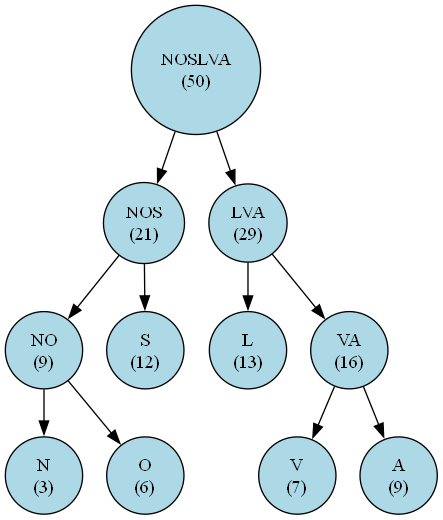

In [6]:
import heapq
from graphviz import Digraph
from IPython.display import display, Image

# Визначення вузла дерева Гафмена
class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''

    def __lt__(self, other):
        return self.freq < other.freq

# Побудова дерева Гафмена
def build_huffman_tree(chars, freq):
    nodes = []
    for i in range(len(chars)):
        heapq.heappush(nodes, Node(freq[i], chars[i]))

    while len(nodes) > 1:
        left = heapq.heappop(nodes)
        right = heapq.heappop(nodes)

        left.huff = 0
        right.huff = 1

        new_node = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)
        heapq.heappush(nodes, new_node)

    return nodes[0]


def add_nodes_to_graph(graph, node, parent_label=None):
    if node is not None:
        current_label = f"{node.symbol}\n({node.freq})"
        graph.node(current_label, shape="circle", style="filled", fillcolor="lightblue")
        if parent_label:
            graph.edge(parent_label, current_label)
        add_nodes_to_graph(graph, node.left, current_label)
        add_nodes_to_graph(graph, node.right, current_label)

# Візуалізація дерева з використанням graphviz
def visualize_with_graphviz(node):
    graph = Digraph(format="png")
    add_nodes_to_graph(graph, node)
    return graph

chars = ['N', 'O', 'V', 'A', 'S', 'L']
freq = [3, 6, 7, 9, 12, 13]
root = build_huffman_tree(chars, freq)

graph = visualize_with_graphviz(root)

display(Image(graph.pipe(format='png')))


#### Перевірити результат за допомогою коду, наведеному нижче.

In [17]:
import heapq

class Node:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right
        self.huff = ''  # Створюємо атрибут для зберігання шляху

    def __lt__(self, nxt):
        return self.freq < nxt.freq

# Функція для виводу кодів Гафмена
def print_huffman_codes(node, val=''):
    if node is not None:
        # Додаємо нове значення до шляху
        new_val = val + node.huff
        if node.left is not None:
            print_huffman_codes(node.left, new_val)
        if node.right is not None:
            print_huffman_codes(node.right, new_val)
        if node.left is None and node.right is None:
            # Якщо досягли листа (символа), виводимо його
            print(f"{node.symbol} -> {new_val}")

# Вхідні дані
chars = ['N', 'O', 'V', 'A', 'S', 'L']
freq = [3, 6, 7, 9, 12, 13]

# Створення вузлів для дерева Гафмена
nodes = []
for i in range(len(chars)):
    heapq.heappush(nodes, Node(freq[i], chars[i]))

while len(nodes) > 1:
    left = heapq.heappop(nodes)
    right = heapq.heappop(nodes)
    
    # Призначаємо напрямок для кожного з вузлів
    left.huff = '0'
    right.huff = '1'
    
    # Створюємо новий вузол, що об'єднує два
    new_node = Node(left.freq + right.freq, left.symbol + right.symbol, left, right)
    heapq.heappush(nodes, new_node)

# Вивід кодів Гафмена
print("Huffman Codes:")
print_huffman_codes(nodes[0])



Huffman Codes:
N -> 000
O -> 001
S -> 01
L -> 10
V -> 110
A -> 111


#### Написати процедуру на Python, яка для вхідного повідомлення обчислює список символів chars та список їх частот freq

In [18]:
from collections import Counter

def calculate_frequencies(message):
    # Підрахунок частоти символів
    freq_counter = Counter(message)
    
    # Отримання символів та їх частот
    chars = list(freq_counter.keys())
    freq = list(freq_counter.values())
    
    return chars, freq

# Вхідне повідомлення
message = "novaslava"
chars, freq = calculate_frequencies(message)

# Виведення результату
print("Символи:", chars)
print("Частоти:", freq)


Символи: ['n', 'o', 'v', 'a', 's', 'l']
Частоти: [1, 1, 2, 3, 1, 1]


#### Опрацювати самостійно тему декодування Гафмена  і скориставшись наведеним там кодом, декодувати повідомлення, задане варіантом.

In [15]:
import heapq
from collections import defaultdict

# to map each character its huffman value
codes = {}

# To store the frequency of character of the input data
freq = defaultdict(int)

# A Huffman tree node
class MinHeapNode:
	def __init__(self, data, freq):
		self.left = None
		self.right = None
		self.data = data
		self.freq = freq

	def __lt__(self, other):
		return self.freq < other.freq

# utility function to print characters along with
# their huffman value
def printCodes(root, str):
	if root is None:
		return
	if root.data != '$':
		print(root.data, ":", str)
	printCodes(root.left, str + "0")
	printCodes(root.right, str + "1")

# utility function to store characters along with
# their huffman value in a hash table
def storeCodes(root, str):
	if root is None:
		return
	if root.data != '$':
		codes[root.data] = str
	storeCodes(root.left, str + "0")
	storeCodes(root.right, str + "1")

# function to build the Huffman tree and store it
# in minHeap
def HuffmanCodes(size):
	global minHeap
	for key in freq:
		minHeap.append(MinHeapNode(key, freq[key]))
	heapq.heapify(minHeap)
	while len(minHeap) != 1:
		left = heapq.heappop(minHeap)
		right = heapq.heappop(minHeap)
		top = MinHeapNode('$', left.freq + right.freq)
		top.left = left
		top.right = right
		heapq.heappush(minHeap, top)
	storeCodes(minHeap[0], "")

# utility function to store map each character with its
# frequency in input string
def calcFreq(str, n):
	for i in range(n):
		freq[str[i]] += 1

# function iterates through the encoded string s
# if s[i]=='1' then move to node->right
# if s[i]=='0' then move to node->left
# if leaf node append the node->data to our output string
def decode_file(root, s):
	ans = ""
	curr = root
	n = len(s)
	for i in range(n):
		if s[i] == '0':
			curr = curr.left
		else:
			curr = curr.right

		# reached leaf node
		if curr.left is None and curr.right is None:
			ans += curr.data
			curr = root
	return ans + '\0'

# Driver code
if __name__ == "__main__":
	minHeap = []
	str = "novaslava"
	encodedString, decodedString = "", ""
	calcFreq(str, len(str))
	HuffmanCodes(len(str))

	print("Character With their Frequencies:")
	for key in sorted(codes):
		print(key, codes[key])

	for i in str:
		encodedString += codes[i]

	print("\nEncoded Huffman data:")
	print(encodedString)

	# Function call
	decodedString = decode_file(minHeap[0], encodedString)
	print("\nDecoded Huffman Data:")
	print(decodedString)


Character With their Frequencies:
a 11
l 010
n 011
o 101
s 100
v 00

Encoded Huffman data:
0111010011100010110011

Decoded Huffman Data:
novaslava 


### **Контрольні питання**

1. Що таке жадібні алгоритми?

   
  Жадібні алгоритми — це методи розв’язання задач, де на кожному етапі приймаються локально оптимальні рішення, сподіваючись, що це призведе до           глобально оптимального результату. Вони використовуються в задачах, де можна приймати рішення, не розглядаючи майбутні наслідки (наприклад, алгоритм    Гафмена, алгоритм Дейкстри).

2. Що таке префіксний код?

    Який код використовується у коді Гафмена?
    Префіксний код — це тип кодування, де жоден код не є префіксом іншого. В алгоритмі Гафмена використовується префіксний код, де кожен символ має         унікальну бітову послідовність, що дозволяє однозначно декодувати повідомлення.

3. Як пов’язана структура даних «купа» зі структурою даних «черга з пріоритетами»?

  Купа є реалізацією черги з пріоритетами, де елементи з найбільшим (або найменшим) пріоритетом витягуються першими. Мін-купа 
  (де корінь має найменший елемент) часто використовується для організації черги з пріоритетами, зокрема в алгоритмі Гафмена.

4. Що таке стиснення даних і для чого воно використовується?Які його основні переваги?

   Стиснення даних — це процес зменшення об'єму даних для економії пам'яті або прискорення передачі. Основні переваги: економія місця, зменшення часу      на передачу даних, зниження витрат на зберігання та передачу інформації.

5. Які кроки необхідно виконати для стиснення даних за допомогою алгоритму кодування Гафмена?
   
   Підрахувати частоти символів у вхідному тексті.
   Побудувати дерево Гафмена, використовуючи мін-купи для вибору найменших частот.
   Призначити бінарні коди для кожного символу, шляхом проходу по дереву.
   Зберегти результати в таблиці кодування.
   Використовувати ці коди для заміни символів у тексті.

6. Які основні обмеження та недоліки алгоритму кодування Гафмена? Чи можливо покращити його продуктивність?

   Недоліки:

  Алгоритм не оптимальний для всіх типів даних (наприклад, короткі рядки або рівномірно розподілені частоти).
  Вимагає значних ресурсів для великих обсягів даних.
  Покращення:
  Використання модифікацій алгоритму для специфічних типів даних, таких як адаптивне кодування Гафмена.
  Прискорення побудови дерева з використанням інших структур даних.

7. Які існують альтернативні методи стиснення даних, що можуть конкурувати з алгоритмом Гафмена?

Альтернативи:

Алгоритм арифметичного кодування, який здатний досягати більшої ефективності при високій різноманітності символів.
Алгоритм Лемпела-Зіва (LZ77, LZ78), який використовує методи пошуку і заміни повторюваних фрагментів.
Алгоритм Бурів-Шеннона, який зосереджений на побудові більш складних схем кодування для певних типів даних.

8. Які практичні застосування можуть мати алгоритми стиснення даних, зокрема алгоритм Гафмена, у сучасних інформаційних системах?

Практичні застосування:

Стиснення файлів (ZIP, RAR), для зменшення розміру даних.
Стиснення текстів і зображень у веб-технологіях (наприклад, у форматах PNG, JPEG).
Використання у протоколах передачі даних (HTTP, електронна пошта) для швидкої та економної передачі інформації.
Відео та аудіо кодеки для зменшення розміру мультимедійних файлів.